In [ ]:
import numpy as np
import pandas as pd
# 1. Load and inspect the dataset
df = pd.read_csv('telescope_data.csv')

Original class distribution:
class
g    12332
h     6688
Name: count, dtype: int64

Balanced class distribution:
class
h    6688
g    6688
Name: count, dtype: int64
k =  1 | Manual: 0.9661 | Sklearn: 0.9661
k =  2 | Manual: 0.9661 | Sklearn: 0.9591
k =  3 | Manual: 0.9731 | Sklearn: 0.9731
k =  4 | Manual: 0.9726 | Sklearn: 0.9676
k =  5 | Manual: 0.9736 | Sklearn: 0.9736
k =  6 | Manual: 0.9761 | Sklearn: 0.9701
k =  7 | Manual: 0.9761 | Sklearn: 0.9761
k =  8 | Manual: 0.9766 | Sklearn: 0.9726
k =  9 | Manual: 0.9786 | Sklearn: 0.9786
k = 10 | Manual: 0.9791 | Sklearn: 0.9756
k = 11 | Manual: 0.9781 | Sklearn: 0.9781
k = 12 | Manual: 0.9791 | Sklearn: 0.9761
k = 13 | Manual: 0.9771 | Sklearn: 0.9771
k = 14 | Manual: 0.9766 | Sklearn: 0.9756
k = 15 | Manual: 0.9776 | Sklearn: 0.9776
k = 16 | Manual: 0.9771 | Sklearn: 0.9741
k = 17 | Manual: 0.9771 | Sklearn: 0.9771
k = 18 | Manual: 0.9771 | Sklearn: 0.9771
k = 19 | Manual: 0.9766 | Sklearn: 0.9766
k = 20 | Manual: 0.9771 | Sklearn: 0.

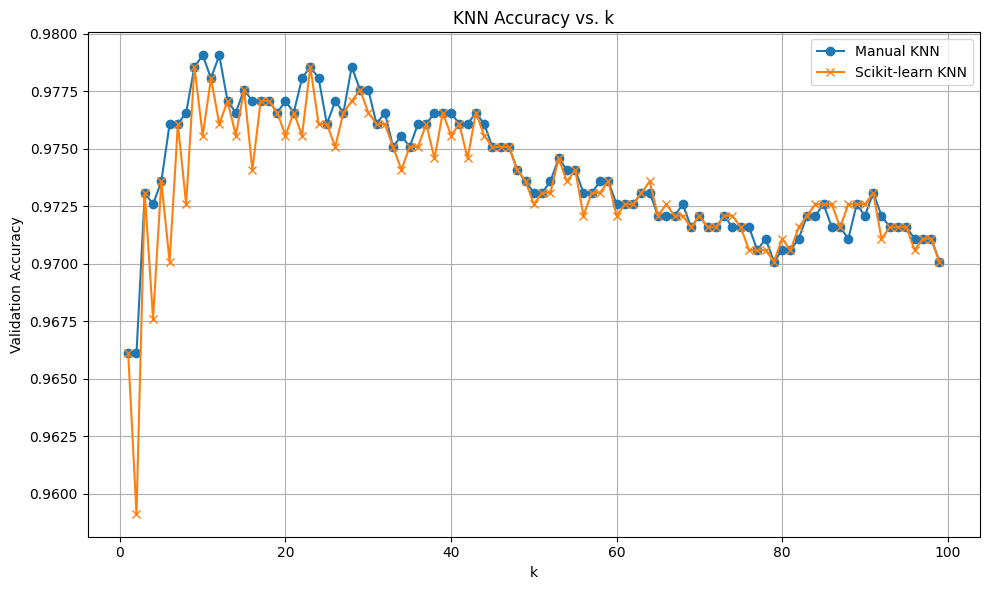


 Best k (Scikit-learn): 9

 Best k (manual): 9

Classification Report (Test Set):
               precision    recall  f1-score   support

      Hadron       0.98      0.98      0.98      1004
       Gamma       0.98      0.98      0.98      1003

    accuracy                           0.98      2007
   macro avg       0.98      0.98      0.98      2007
weighted avg       0.98      0.98      0.98      2007

Confusion Matrix:
 [[981  23]
 [ 23 980]]


\n






In [8]:

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



print("Original class distribution:")
print(df['class'].value_counts())

# 2. Balance the dataset
gamma = df[df['class'] == 'g']
hadron = df[df['class'] == 'h']
gamma_balanced = gamma.sample(n=len(hadron), random_state=42)
df_balanced = pd.concat([gamma_balanced, hadron]).sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced class distribution:")
print(df_balanced['class'].value_counts())

# 3. Prepare features and labels
X = df_balanced.drop('class', axis=1).values
y = LabelEncoder().fit_transform(df_balanced['class'].values)  # g → 1, h → 0

# 4. Train/Val/Test Split
Xx_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
Xx_val, Xx_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(Xx_train)

# Transform the validation and test data
X_val = scaler.transform(Xx_val)
X_test = scaler.transform(Xx_test)

# 5. Manual KNN Implementation


def knn_predict(X_train, y_train, x_test, k=3):
    distances = distances = np.linalg.norm(X_train -x_test ,axis=1)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    return Counter(k_nearest_labels).most_common(1)[0][0]

def knn_predict_batch(X_train, y_train, X_test, k=3):
    return [knn_predict(X_train, y_train, x, k) for x in X_test]

def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# 6. Try
k_range = range(1, 100)
acc_manual = []
acc_sklearn = []

for k in k_range:
    # Manual
    y_val_pred_manual = knn_predict_batch(X_train, y_train, X_val, k)
    acc_m = accuracy(y_val, y_val_pred_manual)
    acc_manual.append(acc_m)

    # Scikit-learn
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc_s = model.score(X_val, y_val)
    acc_sklearn.append(acc_s)

    print(f"k = {k:2d} | Manual: {acc_m:.4f} | Sklearn: {acc_s:.4f}")

# 7. Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_range, acc_manual, marker='o', label='Manual KNN')
plt.plot(k_range, acc_sklearn, marker='x', label='Scikit-learn KNN')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('KNN Accuracy vs. k')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Final Evaluation using best k from sklearn
best_k_manual = k_range[np.argmax(acc_sklearn)]
best_k = k_range[np.argmax(acc_sklearn)]
print(f"\n Best k (Scikit-learn): {best_k}")
print(f"\n Best k (manual): {best_k_manual}")
# Merge train + val
X_final_train = np.vstack((X_train, X_val))
y_final_train = np.hstack((y_train, y_val))

# Train on all
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_final_train, y_final_train)

# Predict on test
y_test_pred = final_model.predict(X_test)

# 9. Final Metrics
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred, target_names=['Hadron', 'Gamma']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\n\n\\n\n\n\n\n")